# **Hope to Skills - Advanced AI Course**
# **Lecture 13 - Hugging Face**
This note book cover the following concepts

1. Use cases of openai API
2. Hugging Face
3. Hugging Face Pipeline


## **Using the open.ai key in the code**
to generate the key you can go to the link
https://platform.openai.com/account/api-keys




In [2]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [4]:
import openai
from google.colab import userdata
openai.api_key= userdata.get('openai')
# print(openai.api_key)

# **Image Generation Using OpenAI**


To learn more you can visit the link https://platform.openai.com/docs/guides/images/usage


We can generate images using the openai API. The Tool for that is Called **Dall-e**


DALL·E has the ability to understand and follow detailed instructions for generating images.

# ***DALL-E-2 Single Image***


In [ ]:
import io
import openai
import requests
import PIL
from PIL import Image


def generate_image_with_text_prompt(text_prompt):
    """
    Generate an image using OpenAI's DALL-E model based on the provided text prompt.

    :param text_prompt: The prompt to generate the image.
    :return: PIL Image object.
    """
    number_of_images = 1
    # Generate the image using OpenAI's DALL-E model
    response = openai.images.generate(
        prompt=text_prompt,
        n=number_of_images,
        size="256x256"
    )

    # Get the image URL from the response

    image_url = response.data[0].url

    # Download the image content and convert it to a PIL image
    image_content = requests.get(image_url).content
    image = Image.open(io.BytesIO(image_content))


    return image

In [ ]:
prompt = input("Enter your prompt to generate the image: ")
image=generate_image_with_text_prompt(prompt)
# print(type(output))


Enter your prompt to generate the image: cat with sunny background


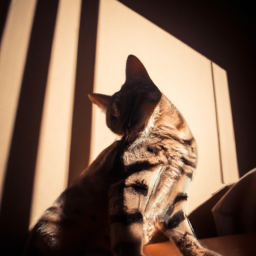

In [ ]:
image


# ***DALL-E-2 Multiple Images***


In [ ]:
import io
import openai
import requests
import PIL
from PIL import Image


def generate_images_with_text_prompt(text_prompt):
    """
    Generate an image using OpenAI's DALL-E model based on the provided text prompt.

    :param text_prompt: The prompt to generate the image.
    :return: PIL Image object.
    """
    number_of_images = 5
    # Generate the image using OpenAI's DALL-E model
    responses = openai.images.generate(
        prompt=text_prompt,
        n=number_of_images,
        size="256x256"
    )

    # Get the image URL from the response

    images = []
    for response in responses.data:

      image_url = response.url
      image_content = requests.get(image_url).content
      image = Image.open(io.BytesIO(image_content))
      images.append(image)



    return images

In [ ]:
prompt = input("Enter your prompt to generate the image: ")
images=generate_images_with_text_prompt(prompt)
# print(type(output))


Enter your prompt to generate the image: a cute fluffy black cat with blue eyes


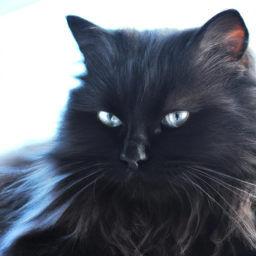

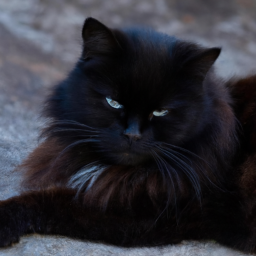

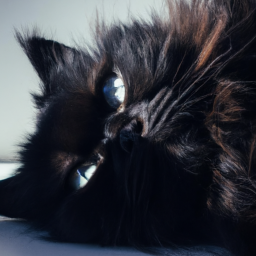

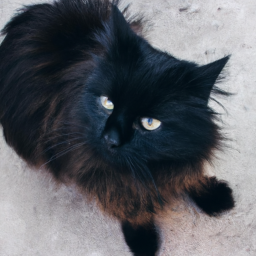

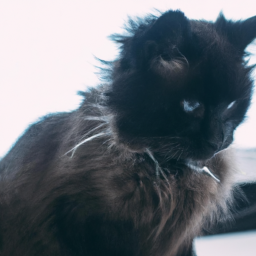

In [ ]:
from IPython.display import display
for image in images:
  display(image)

# images[2]
# images

# ***DALL-E-3 Single Image***


In [ ]:
import io
import openai
import requests
import PIL
from PIL import Image


def generate_image_with_text_prompt_dall_e_3(text_prompt):
    """
    Generate an image using OpenAI's DALL-E model based on the provided text prompt.

    :param text_prompt: The prompt to generate the image.
    :return: PIL Image object.
    """
    number_of_images = 1
    # Generate the image using OpenAI's DALL-E model
    response = openai.images.generate(
        model="dall-e-3",
        prompt=text_prompt,
        n=number_of_images,
        size="1024x1024"
    )

    # Get the image URL from the response
    image_url = response.data[0].url

    # Download the image content and convert it to a PIL image
    image_content = requests.get(image_url).content
    image = Image.open(io.BytesIO(image_content))


    return image

In [ ]:
prompt = input("Enter your prompt to generate the image: ")
image=generate_image_with_text_prompt_dall_e_3(prompt)
# print(type(output))


Enter your prompt to generate the image: a cute fluffy cat with sunny background and nice view


In [ ]:
image


Output hidden; open in https://colab.research.google.com to view.

# **Hugging Face**


In [5]:
# Installing the required modules
!pip install transformers

## **Text Classification**

We can classify the text using the Hugging face prebuit pipelines
we will extensively use **pipline()**

## **Sentiment Analysis**

In [ ]:
import transformers
from transformers import pipeline

pipe = pipeline("text-classification")
pipe("This movie is very boring")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9998028874397278}]

In [ ]:
import transformers
from transformers import pipeline

pipe = pipeline(model="roberta-large-mnli")
pipe("I do not like this movie")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'NEUTRAL', 'score': 0.71393883228302}]

**We can also pass the string in the form of list**

In [ ]:
# pipeline for text classification

pipe = pipeline("sentiment-analysis")
pipe(["This restaurant is awesome", "This restaurant is awful"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998743534088135},
 {'label': 'NEGATIVE', 'score': 0.9996669292449951}]

In [ ]:
pipe("I don't know where I am going")

[{'label': 'NEGATIVE', 'score': 0.9987780451774597}]

## **Text Summarization**

we can summarize the text using the hugging face pipline
for that we need to pass the pipeline the parameter as "summarization"

In [15]:
import transformers
from transformers import pipeline

In [16]:
# text to be summarized
input_text = "Start by providing your text input. It could be a sentence or a paragraph.\n Tokenization: The input is tokenized, which means breaking it down into smaller units like words or subwords.\n Tokens are the building blocks for NLP models\n.Model: The tokenized input is passed through a pre-trained NLP model. \n Hugging Face offers a wide range of models for different NLP tasks, such as sentiment analysis,\n  question answering, and text generation.Prediction/Output: The model processes the tokenized input and generates \n a prediction or output specific to the task. For example, if it's sentiment analysis, \n it could predict whether the input is positive or negative"
print(input_text)

Start by providing your text input. It could be a sentence or a paragraph.
 Tokenization: The input is tokenized, which means breaking it down into smaller units like words or subwords.
 Tokens are the building blocks for NLP models
.Model: The tokenized input is passed through a pre-trained NLP model. 
 Hugging Face offers a wide range of models for different NLP tasks, such as sentiment analysis,
  question answering, and text generation.Prediction/Output: The model processes the tokenized input and generates 
 a prediction or output specific to the task. For example, if it's sentiment analysis, 
 it could predict whether the input is positive or negative


In [18]:
# use bart in pytorch
summarizer = pipeline("summarization")
summarizer(f"Text Input: {input_text}", min_length=20, max_length=60)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Hugging Face offers a wide range of models for different NLP tasks, such as sentiment analysis, question answering, and text generation .'}]

## **Name Entity Recognition**

Named Entity Recognition is a natural language processing (NLP) task

that involves identifying and classifying named entities in text into

predefined categories such as person names, organizations, locations, dates, and more.


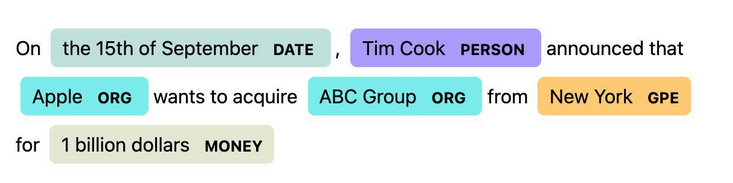

In [19]:
nlp = pipeline("ner")
example = "Obama is going to New York"

ner_results = nlp(example)
print(ner_results)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-PER', 'score': 0.9986333, 'index': 1, 'word': 'Obama', 'start': 0, 'end': 5}, {'entity': 'I-LOC', 'score': 0.9995697, 'index': 5, 'word': 'New', 'start': 18, 'end': 21}, {'entity': 'I-LOC', 'score': 0.99916446, 'index': 6, 'word': 'York', 'start': 22, 'end': 26}]


## **Image Classification**


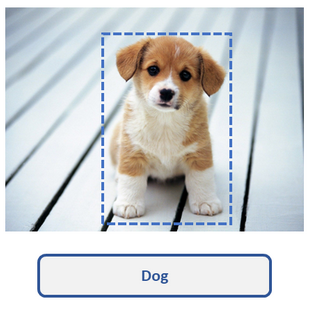

To use this pipline download the image in PNG format.

Click on the folder icon on the left side panel.

Upload the image and copy its path in the code

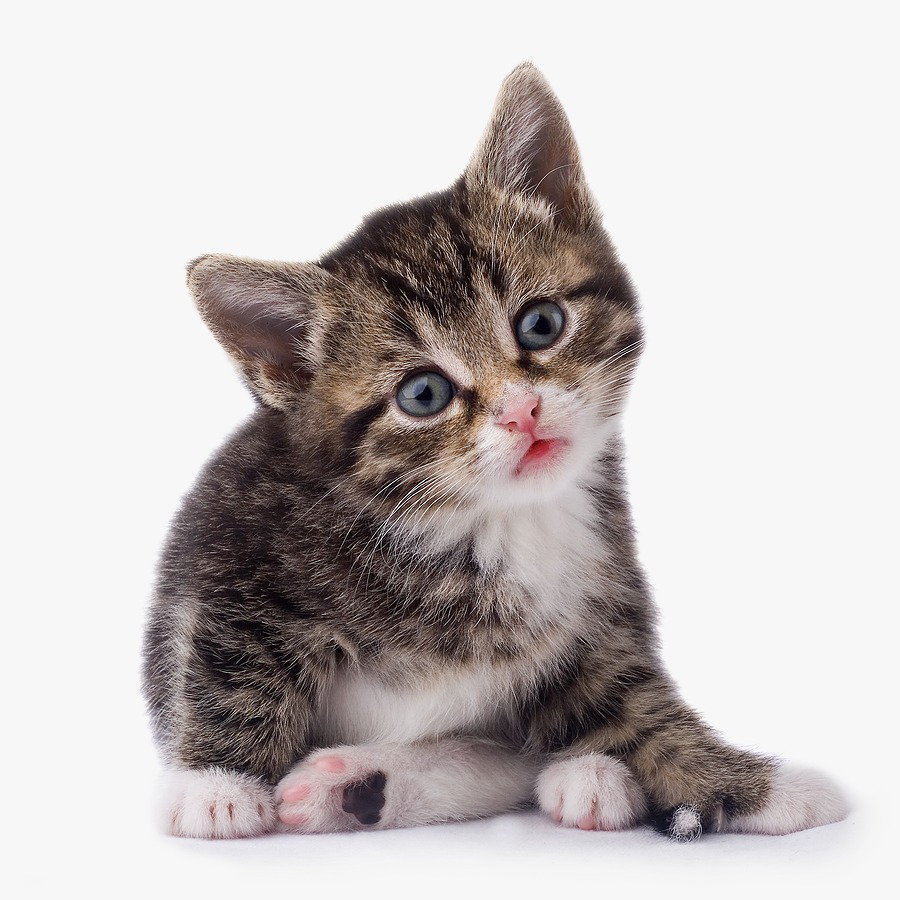

In [23]:
# Displaying the image
from PIL import Image

# Specify the path to your PNG image
image_path = '/content/cat.png'



# Open the image using PIL
image = Image.open(image_path)

# Display the image
image


In [24]:
from transformers import pipeline

classifier = pipeline(model="microsoft/beit-base-patch16-224-pt22k-ft22k")
classifier("/content/cat.png")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.2580420672893524,
  'label': 'domestic_cat, house_cat, Felis_domesticus, Felis_catus'},
 {'score': 0.23537765443325043, 'label': 'tabby, tabby_cat'},
 {'score': 0.11903949081897736, 'label': 'kitten, kitty'},
 {'score': 0.0802684798836708, 'label': 'feline, felid'},
 {'score': 0.040242262184619904, 'label': 'young_mammal'}]

## ***Stable Diffusion Pipeline***

In [25]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00


In [26]:
import transformers
from transformers import pipeline
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on Mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

## ***Translation Pipeline***
Translation Model links: https://huggingface.co/models?pipeline_tag=translation

In [28]:
en_fr_translator = pipeline("translation_en_to_fr")
response= en_fr_translator("Good Morning ")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [29]:
print(response)

[{'translation_text': 'Bonjour'}]


#TASK-01
Translate the given input text to urdu using the given huggingface pipeline: https://huggingface.co/facebook/mbart-large-50-many-to-many-mmt

input_str= """
The year 2022 brought AI into the mainstream through widespread familiarity with applications of Generative Pre-Training Transformer.
"""

In [30]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "Unbabel/TowerBase-7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)


# print(tokenizer.decode(outputs[0], skip_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/94.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_id)

text = "English: My name is TowerBase.\nPortuguese:"
inputs = tokenizer(text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=20)

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/13.5G [00:00<?, ?B/s]

In [ ]:
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

NameError: name 'tokenizer' is not defined